In [1]:
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
import pandas_datareader.data as web 

style.use('ggplot')

/Users/chinsyo/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2017, 11, 11)
df = web.DataReader('BABA', 'yahoo', start, end)
df.to_csv('BABA.csv')

In [3]:
df = pd.read_csv('BABA.csv', parse_dates=True, index_col=0)
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

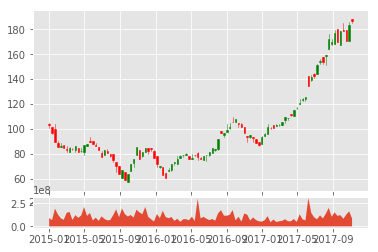

In [4]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()